# Data Cleaning and Data Analysis

In [51]:
import pandas as pd

#load the dataset
dataset = pd.read_csv('heart.csv')

In [52]:
dataset.head() #view first 5 rows of data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49,F,NAP,160,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37,M,ATA,130,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48,F,ASY,138,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54,M,NAP,150,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


In [53]:
# see data row and column
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
dataset.shape

(918, 12)

In [54]:
# see data types of each column
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object

In [55]:
#statistical summary
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,916.000000,915.000000,917.000000,918.000000,903.000000
mean,53.510893,132.396514,198.852620,0.232787,136.767721,0.887364,0.555925
std,9.432617,18.514154,109.193372,0.422839,25.442922,1.066570,0.497138
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.750000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [56]:
# any null-values?
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     916 non-null    float64
 5   FastingBS       915 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           917 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    903 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


In [57]:
# drop null values row
dataset.dropna(inplace=True)

#not dropping any columns since all are related data
# and show again the shape of dataset
dataset.shape

(897, 12)

In [58]:
# https://towardsdatascience.com/how-to-clean-your-data-in-python-8f178638b98d
# begin with checking unique values in each columns to ensure values are correct and clean

# Age: age of the patient [years]
dataset['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

In [59]:
# Sex: sex of the patient [M: Male, F: Female]
dataset['Sex'].unique()

array(['M', 'F'], dtype=object)

In [60]:
# ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
dataset['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [61]:
# RestingBP: resting blood pressure [mm Hg]
dataset['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
       200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152, 116,
         0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102,
        96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192, 129,
       164], dtype=int64)

In [62]:
# Cholesterol: serum cholesterol [mm/dl]
dataset['Cholesterol'].unique()

array([289., 180., 283., 214., 195., 339., 237., 208., 207., 284., 211.,
       164., 204., 234., 273., 196., 201., 248., 267., 223., 184., 288.,
       215., 209., 260., 468., 188., 518., 167., 224., 172., 186., 254.,
       306., 250., 177., 227., 230., 294., 264., 259., 175., 318., 216.,
       340., 233., 205., 245., 194., 270., 213., 365., 342., 253., 277.,
       202., 297., 225., 246., 412., 265., 182., 218., 268., 163., 529.,
       100., 206., 238., 139., 263., 291., 229., 307., 210., 329., 147.,
        85., 269., 275., 179., 392., 466., 129., 241., 255., 276., 282.,
       338., 160., 156., 272., 240., 393., 161., 228., 292., 388., 166.,
       247., 331., 341., 243., 279., 198., 249., 168., 603., 159., 190.,
       185., 290., 212., 231., 222., 235., 320., 266., 287., 404., 312.,
       251., 328., 285., 280., 192., 193., 308., 219., 257., 132., 226.,
       217., 303., 298., 256., 295., 173., 315., 281., 309., 200., 336.,
       355., 326., 171., 491., 271., 274., 394., 22

In [63]:
# FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
dataset['FastingBS'].unique()

array([0., 1.])

In [64]:
# RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
dataset['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [65]:
# MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
dataset['MaxHR'].unique()

array([172., 156.,  98., 108., 122., 170., 142., 130., 120.,  99., 145.,
       140., 137., 150., 166., 165., 125., 160., 164., 138., 178., 112.,
       118., 127., 114., 154., 155.,  87., 148., 100., 168., 184., 121.,
       153., 134.,  96., 174., 175., 144.,  82., 135., 115., 128., 116.,
        94., 110.,  92., 180., 152., 124., 106., 185., 139., 190., 146.,
       158., 132., 176., 119., 188., 162., 105.,  90., 136., 167., 129.,
       102., 143., 103.,  91., 126.,  93., 131., 149., 123., 182., 141.,
        77., 109., 133., 179., 113., 104.,  95.,  97., 117.,  86.,  63.,
       157.,  83.,  60.,  70., 163.,  67.,  72.,  78.,  84., 111.,  80.,
       107., 161.,  69.,  88.,  73., 159., 151., 181., 186., 177., 173.,
       169., 171., 147.,  71., 192., 195., 194., 187., 202.])

In [66]:
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
dataset['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [67]:
# Oldpeak: oldpeak = ST [Numeric value measured in depression]
dataset['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.3,  0.3,  1.8,  2.6,
       -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1, -0.7,
       -0.8,  1.6,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [68]:
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
dataset['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [69]:
# HeartDisease: output class [1: heart disease, 0: Normal]
dataset['HeartDisease'].unique()

array([0., 1.])

In [70]:
# print duplicated rows https://www.w3schools.com/python/pandas/pandas_cleaning_duplicates.asp
# it will returns True for every row that is a duplicate, othwerwise False
print(dataset.duplicated())
#no duplicated rows, no need to remove any rows

0      False
1      False
2      False
3      False
4      False
       ...  
912    False
913    False
914    False
916    False
917    False
Length: 897, dtype: bool


# Correlations and Visualize

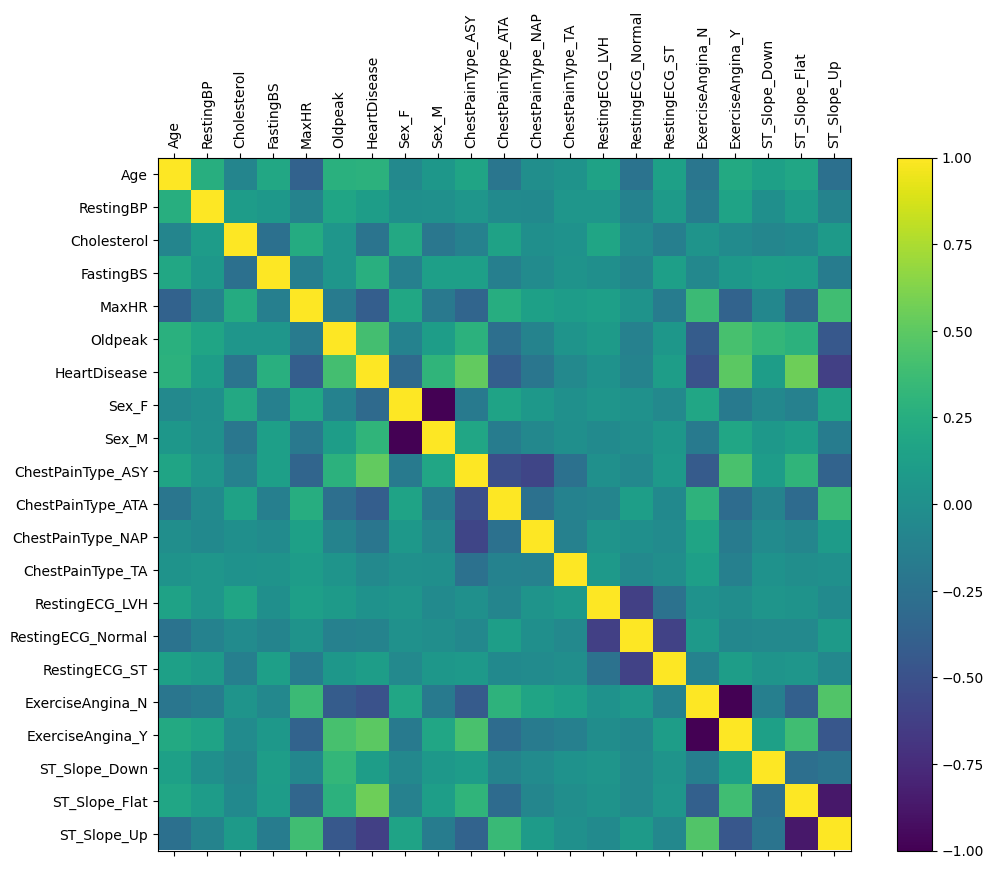

In [71]:
# https://www.linkedin.com/pulse/detailed-preprocessing-process-machine-learning-python-leonardo-a

# one-hot encoding for all categorical columns https://www.geeksforgeeks.org/python-pandas-get_dummies-method/
encoded_dataset = pd.get_dummies(dataset)

# compute the correlation matrix
correlations = encoded_dataset.corr()

import matplotlib.pyplot as plt 
# plot matrix as a heatmap
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

# Set label
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations.columns)), correlations.columns)

plt.show()

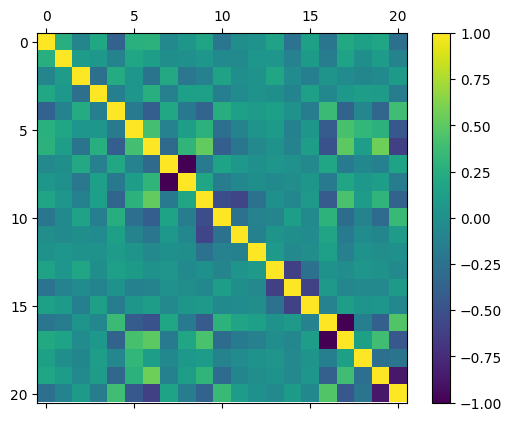

In [72]:
# without establishing label
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

# Data Visualization with Histogram

In [73]:
# https://www.linkedin.com/pulse/detailed-preprocessing-process-machine-learning-python-leonardo-a
# generate charts
%matplotlib inline

# this dataset contains both numerical and categorical features, a scatter plot may not be the most suitable visualization, histogram is the better way

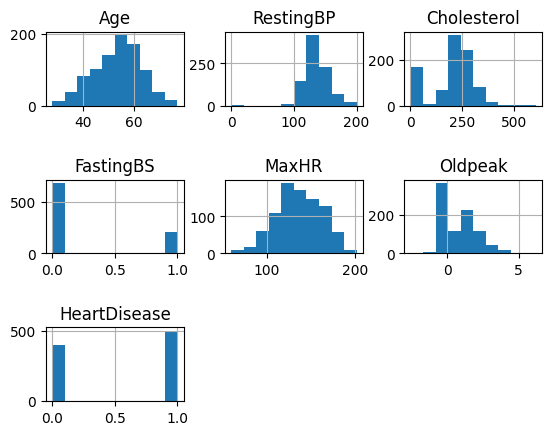

In [74]:
# show histogram of each column
dataset.hist()
plt.subplots_adjust(hspace=1.0) #dont let diagrams cross over
plt.show()

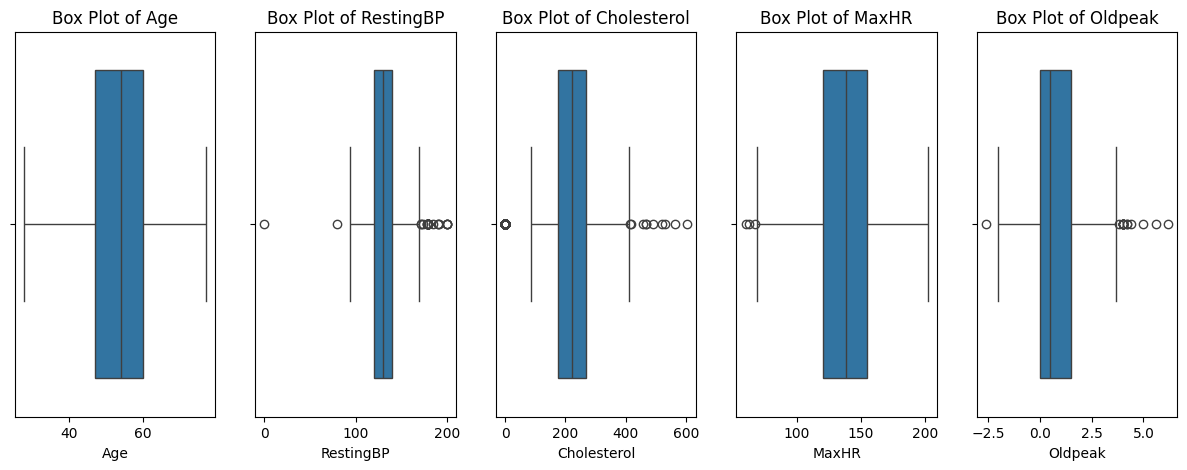

In [75]:
import seaborn as sns

# choose the numerical columns
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=column, data=dataset, ax=axes[i])

# titles
for i, column in enumerate(numerical_columns):
    axes[i].set_title(f'Box Plot of {column}')

plt.show()

# Feature Scaling

In [76]:
from sklearn.preprocessing import StandardScaler

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# columns that need scaling
columns_to_scale = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# implement standardization (Z-score normalization)
scaler = StandardScaler()
encoded_dataset[columns_to_scale] = scaler.fit_transform(encoded_dataset[columns_to_scale])

# view the latest data values
print(encoded_dataset.head())

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.433892   0.408105     0.819937        0.0  1.391609 -0.828169   
1 -0.483107   1.485576    -0.175478        0.0  0.759612  0.104965   
2 -1.750820  -0.130630     0.765143        0.0 -1.531377 -0.828169   
3 -0.588750   0.300358     0.135019        0.0 -1.136379  0.571531   
4  0.045107   0.946841    -0.038494        0.0 -0.583382 -0.828169   

   HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0           0.0  False   True              False  ...              False   
1           1.0   True  False              False  ...               True   
2           0.0  False   True              False  ...              False   
3           1.0   True  False               True  ...              False   
4           0.0  False   True              False  ...               True   

   ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0             False           False              

In [77]:
# interaction features: combined effect of the two factors might have an impact on heart disease risk https://www.geeksforgeeks.org/data-analysis-with-python/

#patient's age and their maximum heart rate
encoded_dataset["Age_MaxHR_Interaction"] = encoded_dataset["Age"] * encoded_dataset["MaxHR"] 

# patient's age may impact the relationship between blood pressure and the likelihood of heart disease
encoded_dataset["Age_RestingBP_Interaction"] = encoded_dataset["Age"] * encoded_dataset["RestingBP"]

# cholesterol and resting blood pressure
encoded_dataset["Cholesterol_RestingBP_Interaction"] = encoded_dataset["Cholesterol"] * encoded_dataset["RestingBP"]

# cholesterol and maximum heart rate
encoded_dataset["Cholesterol_MaxHR_Interaction"] = encoded_dataset["Cholesterol"] * encoded_dataset["MaxHR"]

# view the latest data values
print(encoded_dataset.head())

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.433892   0.408105     0.819937        0.0  1.391609 -0.828169   
1 -0.483107   1.485576    -0.175478        0.0  0.759612  0.104965   
2 -1.750820  -0.130630     0.765143        0.0 -1.531377 -0.828169   
3 -0.588750   0.300358     0.135019        0.0 -1.136379  0.571531   
4  0.045107   0.946841    -0.038494        0.0 -0.583382 -0.828169   

   HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ...  RestingECG_ST  \
0           0.0  False   True              False  ...          False   
1           1.0   True  False              False  ...          False   
2           0.0  False   True              False  ...           True   
3           1.0   True  False               True  ...          False   
4           0.0  False   True              False  ...          False   

   ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0              True             False          False          False   
1   

# Data Split

In [78]:
# https://realpython.com/train-test-split-python-data/#prerequisites-for-using-train_test_split
from sklearn.model_selection import train_test_split

# get x and y data
x = encoded_dataset.drop("HeartDisease", axis=1)
y = encoded_dataset["HeartDisease"]

# split data randomly with 70% train data, 30% test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [79]:
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_MaxHR_Interaction,Age_RestingBP_Interaction,Cholesterol_RestingBP_Interaction,Cholesterol_MaxHR_Interaction
835,0.045107,-1.208100,0.363325,0.0,-0.425383,1.784605,False,True,True,False,...,False,False,True,False,True,False,-0.019188,-0.054494,-0.438933,-0.154552
690,-0.905678,0.515853,1.002582,0.0,0.404113,-0.828169,False,True,True,False,...,False,False,True,False,True,False,-0.365997,-0.467196,0.517184,0.405157
533,0.995892,-1.208100,0.482044,0.0,0.127615,1.038098,False,True,True,False,...,True,False,True,False,True,False,0.127091,-1.203138,-0.582357,0.061516
95,0.467678,-0.130630,0.582499,0.0,0.127615,1.038098,False,True,True,False,...,False,False,True,False,True,False,0.059683,-0.061093,-0.076092,0.074335
739,0.045107,-0.399997,0.673821,0.0,0.601613,-0.361602,False,True,False,False,...,False,True,False,True,False,False,0.027137,-0.018043,-0.269527,0.405379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,-0.271821,-0.130630,-1.819281,1.0,1.036111,-0.828169,False,True,True,False,...,True,True,False,False,True,False,-0.281637,0.035508,0.237652,-1.884976
17,-1.116963,-0.669365,0.016300,0.0,1.115110,-0.828169,True,False,False,True,...,False,True,False,False,False,True,-1.245537,0.747656,-0.010910,0.018176
417,-1.011321,-0.130630,0.089358,0.0,-0.385883,-0.828169,False,True,True,False,...,True,True,False,False,False,True,0.390251,0.132109,-0.011673,-0.034482
38,-0.588750,-0.669365,-0.202874,1.0,0.443613,-0.828169,True,False,False,True,...,True,True,False,False,False,True,-0.261177,0.394088,0.135797,-0.089998


In [80]:
x_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_MaxHR_Interaction,Age_RestingBP_Interaction,Cholesterol_RestingBP_Interaction,Cholesterol_MaxHR_Interaction
666,-0.166178,-0.238377,0.052829,1.0,1.865607,-0.828169,False,True,False,True,...,False,True,False,False,False,True,-0.310023,0.039613,-0.012593,0.098557
778,0.467678,-0.238377,0.545970,0.0,-0.267383,1.971232,False,True,True,False,...,False,False,True,False,True,False,-0.125049,-0.111484,-0.130147,-0.145983
411,0.045107,2.563047,-1.819281,1.0,0.522613,0.571531,False,True,True,False,...,False,True,False,False,True,False,0.023574,0.115612,-4.662902,-0.950780
381,-0.377464,-0.938733,-1.819281,0.0,-0.662382,-0.361602,False,True,True,False,...,False,False,True,False,True,False,0.250025,0.354338,1.707819,1.205058
900,0.467678,-0.992606,1.084772,0.0,0.127615,3.277619,False,True,True,False,...,True,True,False,True,False,False,0.059683,-0.464220,-1.076751,0.138433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,-1.011321,-0.669365,-0.275932,0.0,0.285614,1.784605,False,True,True,False,...,False,False,True,True,False,False,-0.288847,0.676943,0.184699,-0.078810
223,-2.173391,-0.669365,0.902127,0.0,1.905106,-0.828169,False,True,False,False,...,False,True,False,False,False,True,-4.140542,1.454792,-0.603852,1.718648
120,-0.694392,0.138738,0.445515,1.0,1.312609,-0.828169,True,False,False,False,...,False,True,False,False,True,False,-0.911466,-0.096338,0.061810,0.584787
692,-1.539535,-2.070077,-0.001965,0.0,1.668108,-0.828169,True,False,False,False,...,False,True,False,False,False,True,-2.568109,3.186955,0.004068,-0.003278


In [81]:
y_train

835    1.0
690    1.0
533    1.0
95     1.0
739    0.0
      ... 
401    1.0
17     0.0
417    0.0
38     0.0
389    1.0
Name: HeartDisease, Length: 627, dtype: float64

In [82]:
y_test

666    0.0
778    1.0
411    1.0
381    1.0
900    1.0
      ... 
907    1.0
223    0.0
120    1.0
692    0.0
813    0.0
Name: HeartDisease, Length: 270, dtype: float64

# Model Training

In [83]:
# https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

# training model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logistic_model = LogisticRegression()

# fit the model to training data
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [84]:
# similar to logistic
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

# Model Evaluation

In [85]:
from sklearn.metrics import accuracy_score

# logistic model accuracy
y_pred_logistic_model = logistic_model.predict(x_test)
logistic_model_accuracy = accuracy_score(y_test, y_pred_logistic_model)
print("Test Accuracy of logistic model: ", logistic_model_accuracy)

# decision tree accuracy
decision_tree_model_y_pred = decision_tree_model.predict(x_test)
decision_tree_model_accuracy = accuracy_score(y_test, decision_tree_model_y_pred)
print("Test Accuracy of decision tree model: ", decision_tree_model_accuracy)

Test Accuracy of logistic model:  0.8481481481481481
Test Accuracy of decision tree model:  0.8


In [86]:
# https://proclusacademy.com/blog/practical/precision-recall-f1-score-sklearn/
from sklearn.metrics import precision_score, recall_score, f1_score

# logistic regression model
precision_logistic = precision_score(y_test, y_pred_logistic_model) #how many positive predictions made were actually correct
recall_logistic = recall_score(y_test, y_pred_logistic_model) #how many actual positive instances were correctly predicted
f1_logistic = f1_score(y_test, y_pred_logistic_model) #combine precision and recall into a balanced measure

print("Precision for logistic model: ", precision_logistic)
print("Recall for logistic model: ", recall_logistic)
print("F1-Score for logistic model: ", f1_logistic)

# decision tree model
precision_decision_tree = precision_score(y_test, decision_tree_model_y_pred)
recall_decision_tree = recall_score(y_test, decision_tree_model_y_pred)
f1_decision_tree = f1_score(y_test, decision_tree_model_y_pred)

print("\nPrecision for decision tree model: ", precision_decision_tree)
print("Recall for decision tree model: ", recall_decision_tree)
print("F1-Score for decision tree model: ", f1_decision_tree)

Precision for logistic model:  0.8590604026845637
Recall for logistic model:  0.8648648648648649
F1-Score for logistic model:  0.8619528619528619

Precision for decision tree model:  0.8175675675675675
Recall for decision tree model:  0.8175675675675675
F1-Score for decision tree model:  0.8175675675675675


# Model Tuning

In [87]:
# try to remove the interacted columns

# get x and y data
columns_to_drop = ["HeartDisease", "Age_MaxHR_Interaction", "Age_RestingBP_Interaction", "Cholesterol_RestingBP_Interaction", "Cholesterol_MaxHR_Interaction"]
x = encoded_dataset.drop(columns=columns_to_drop, axis=1)
y = encoded_dataset["HeartDisease"]

# split data randomly with 70% train data, 30% test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [88]:
x_train #check current columns

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
667,1.207178,0.408105,1.988864,1.0,0.799112,-0.081662,True,False,False,False,True,False,True,False,False,True,False,False,False,True
472,-0.060536,1.162335,-1.819281,1.0,0.127615,0.571531,False,True,True,False,False,False,False,False,True,False,True,False,True,False
454,0.467678,0.192611,0.034564,1.0,-0.543882,0.291591,False,True,True,False,False,False,False,True,False,False,True,False,True,False
266,-0.166178,-0.130630,0.902127,0.0,-1.057380,0.104965,False,True,True,False,False,False,False,True,False,False,True,False,True,False
679,0.995892,0.677473,0.308531,1.0,0.522613,1.318038,False,True,False,False,False,True,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,-0.377464,-0.669365,0.180680,0.0,0.838611,0.664845,True,False,False,False,True,False,False,True,False,True,False,False,True,False
327,0.573321,-0.399997,-1.819281,1.0,-0.701881,0.011651,False,True,True,False,False,False,False,True,False,False,True,False,False,True
161,-0.483107,-0.238377,0.116754,0.0,-1.610377,-0.828169,False,True,True,False,False,False,False,True,False,False,True,False,True,False
633,1.101535,-1.208100,0.107622,0.0,0.285614,0.851471,False,True,False,False,False,True,True,False,False,False,True,False,True,False


In [89]:
# train model again

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [90]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [91]:
# Check accuracy to compare

# logistic model accuracy
y_pred_logistic_model = logistic_model.predict(x_test)
logistic_model_accuracy = accuracy_score(y_test, y_pred_logistic_model)
print("Test Accuracy of logistic model: ", logistic_model_accuracy)

# decision tree accuracy
decision_tree_model_y_pred = decision_tree_model.predict(x_test)
decision_tree_model_accuracy = accuracy_score(y_test, decision_tree_model_y_pred)
print("Test Accuracy of decision tree model: ", decision_tree_model_accuracy)

Test Accuracy of logistic model:  0.8592592592592593
Test Accuracy of decision tree model:  0.8074074074074075


In [92]:
# check other metrics to compare

# logistic regression model
precision_logistic = precision_score(y_test, y_pred_logistic_model) #how many positive predictions made were actually correct
recall_logistic = recall_score(y_test, y_pred_logistic_model) #how many actual positive instances were correctly predicted
f1_logistic = f1_score(y_test, y_pred_logistic_model) #combine precision and recall into a balanced measure

print("Precision for logistic model: ", precision_logistic)
print("Recall for logistic model: ", recall_logistic)
print("F1-Score for logistic model: ", f1_logistic)

# decision tree model
precision_decision_tree = precision_score(y_test, decision_tree_model_y_pred)
recall_decision_tree = recall_score(y_test, decision_tree_model_y_pred)
f1_decision_tree = f1_score(y_test, decision_tree_model_y_pred)

print("\nPrecision for decision tree model: ", precision_decision_tree)
print("Recall for decision tree model: ", recall_decision_tree)
print("F1-Score for decision tree model: ", f1_decision_tree)

Precision for logistic model:  0.8689655172413793
Recall for logistic model:  0.8689655172413793
F1-Score for logistic model:  0.8689655172413793

Precision for decision tree model:  0.8206896551724138
Recall for decision tree model:  0.8206896551724138
F1-Score for decision tree model:  0.8206896551724138


In [93]:
# comparison results shows that the models that after dropping interacted columns performed better. Thus, the interacted columns are not helping in enhancing performance

# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
# Hence, perform model tuning in each model

# Logistic Model:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Common C values
}

logistic_model = LogisticRegression()
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_ #get best
print("Best Hyperparameters:", best_params)

# train the final model with best hyperparameters
final_model_logistic = LogisticRegression(C=best_params['C']) #regularization
final_model_logistic.fit(x_train, y_train)

# evaluate
test_accuracy = final_model_logistic.score(x_test, y_test)
print("Test Accuracy of the tuned logistic model: ", test_accuracy)

Best Hyperparameters: {'C': 0.1}
Test Accuracy of the tuned logistic model:  0.8666666666666667


In [94]:
# the output of best hyperparameters is 10 means that the model with a moderate level of regularization performed the best on my test data
# output shows my model that performed well on test data with accuracy of 87.41%

In [95]:
# Decision Tree Model https://www.kaggle.com/code/gauravduttakiit/hyperparameter-tuning-in-decision-trees

param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4,5 ]
}

decision_tree_model = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

final_model_decision = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)
final_model_decision.fit(x_train, y_train)

test_accuracy = final_model_decision.score(x_test, y_test)
print("Test Accuracy of the tuned decision tree model: ", test_accuracy)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
Test Accuracy of the tuned decision tree model:  0.8185185185185185


In [96]:
# The improvement in accuracy indicates that the tuned decision tree model is better at making predictions on my default model test data. It shows hyperparameter tuning to optimize my decision tree model's performance.

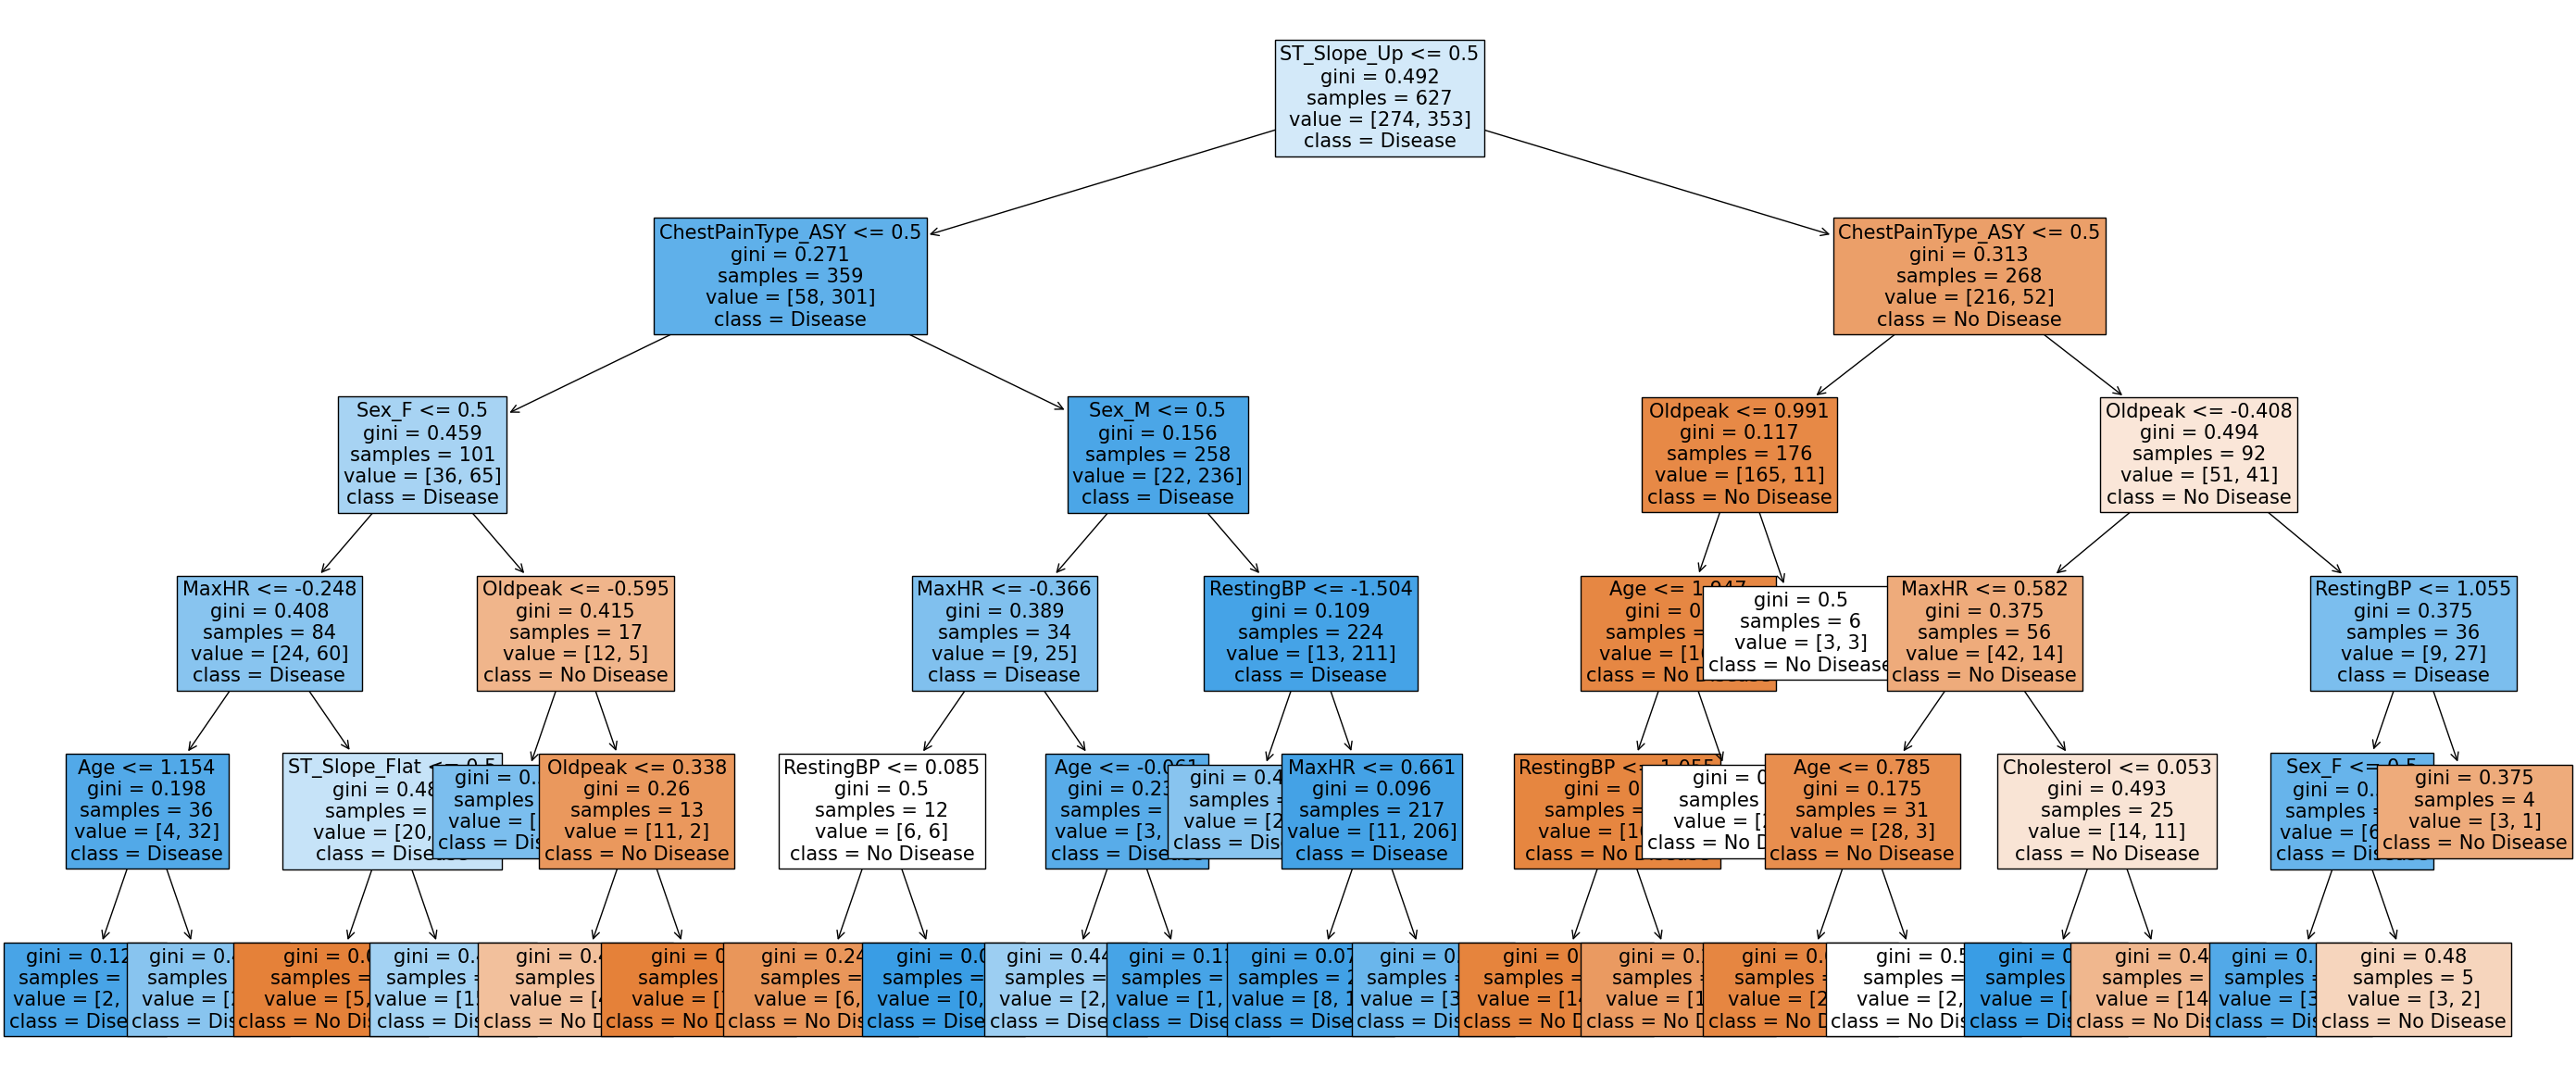

In [97]:
from sklearn import tree #https://www.kaggle.com/code/gauravduttakiit/hyperparameter-tuning-in-decision-trees

# show the tree of decision tree model
fig = plt.figure(figsize=(35, 15))
_ = tree.plot_tree(
    final_model_decision,
    feature_names=x_train.columns,
    fontsize=15,
    class_names=['No Disease', 'Disease'], #No Disease(no heart disease)
    filled=True
)
plt.show() # shows the decision tree that make decision based on which feature


# Model Comparison and Evaluation

In [98]:
# comparison between logister regression and decision tree

# logistic
y_pred_logistic = final_model_logistic.predict(x_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

# decision tree
y_pred_tree = final_model_decision.predict(x_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# show
print("Logistic Regression Metrics on Test Data:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1-Score:", f1_logistic)

print("\nDecision Tree Metrics on Test Data:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1-Score:", f1_tree)


Logistic Regression Metrics on Test Data:
Accuracy: 0.8666666666666667
Precision: 0.8707482993197279
Recall: 0.8827586206896552
F1-Score: 0.8767123287671232

Decision Tree Metrics on Test Data:
Accuracy: 0.8185185185185185
Precision: 0.8116883116883117
Recall: 0.8620689655172413
F1-Score: 0.8361204013377926


In [99]:
# The logistic regression model has higher accuracy, precision, recall, and F1-score compared to the decision tree model. Therefore, based on these metrics, the logistic regression model is the better-performing model for predicting heart failure disease.

# Final model: logistic model
y_pred = final_model_logistic.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Final Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Final Model Evaluation Metrics:
Accuracy: 0.8667
Precision: 0.8707
Recall: 0.8828
F1-Score: 0.8767


In [100]:
# perform cross validation https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

# split data into 5
scores = cross_val_score(final_model_logistic, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", scores)

Cross-validated Accuracy: [0.84920635 0.84920635 0.864      0.84       0.888     ]
